<a href="https://colab.research.google.com/github/eraycaganozdemir/DSA-210-Project/blob/main/DSA210.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily Spending and Step Count Analysis

# Data Collection

# Parsing XML and Extracting Step Count Data

This code parses an XML file, extracts daily step counts for a specific date range, and saves the results to an Excel file.

In [ ]:
!pip install beautifulsoup4

from bs4 import BeautifulSoup
from datetime import datetime
from collections import defaultdict
import pandas as pd

with open('export.xml', 'r', encoding='utf-8') as file:
    data = file.read()

soup = BeautifulSoup(data, 'xml')

steps_per_day = defaultdict(int)

start_date = datetime(2024, 8, 27).date()
end_date = datetime(2024, 12, 25).date()

records = soup.find_all('Record')

for record in records:
    record_type = record.get('type')
    if record_type == 'HKQuantityTypeIdentifierStepCount':
        value = int(record.get('value', 0))
        start_date_str = record.get('startDate')
        date_part = start_date_str.split(' ')[0]
        record_date = datetime.strptime(date_part, '%Y-%m-%d').date()

        if start_date <= record_date <= end_date:
            steps_per_day[record_date] += value

step_data = pd.DataFrame(list(steps_per_day.items()), columns=['Date', 'Steps'])
step_data.to_excel("steps_data.xlsx", index=False)


# Data Cleaning and Preparation



# Adjusting Data for More Readible Format
**Formatting Text from a Word Document**

This code processes and reformats text from a Word document (.docx), applies specific formatting rules, and saves the output into a new Word file.

In [ ]:
from docx import Document
import re

def format_docx(input_file, output_file):
    try:
        doc = Document(input_file)
        formatted_lines = []

        for paragraph in doc.paragraphs:
            line = paragraph.text.strip()

            if not line:
                continue

            line = line.replace("~ ", "")

            line = re.sub(r'(\d{2}/\d{2}/\d{4})(?=\s)', r'\1 -', line)

            if "-" not in line[line.rfind(" "):]:
                line = line.rstrip()

            line = re.sub(r'(\d+)\.(\d+)', r'\1,\2', line)

            formatted_lines.append(line)

        new_doc = Document()
        for line in formatted_lines:
            new_doc.add_paragraph(line)

        new_doc.save(output_file)
        print(f"Formatted text has been written to {output_file}.")
    except Exception as e:
        print(f"An error occurred: {e}")

input_file = 'decdata1.docx'
output_file = 'output.docx'
format_docx(input_file, output_file)


Formatted text has been written to output.docx.


# Extracting and Structuring Data from a Word Document into Excel

This code reads a .docx Word document containing structured data (date, location, amount), parses it, and saves it into an organized Excel file.

In [ ]:
from docx import Document
import pandas as pd

file_path = "decdata1.docx"
document = Document(file_path)

data = []

for paragraph in document.paragraphs:
    line = paragraph.text.strip()
    if line:
        parts = line.split(" - ")
        if len(parts) == 3:
            date = parts[0].strip()
            location = parts[1].strip()
            amount = parts[2].strip()
            data.append([date, location, amount])

df = pd.DataFrame(data, columns=["Date", "Location", "Amount"])

output_file = "spending_analysis_oct.xlsx"
df.to_excel(output_file, index=False)

print(f"Data has been saved to {output_file}")


Data has been saved to spending_analysis_oct.xlsx


# Calculating Total Spending Per Date from an Excel File

This code reads spending data from an Excel file, groups it by date, calculates the total spending for each date, and saves the results into a new Excel file.

In [ ]:
import pandas as pd

file_path = "updated_spending_analysis_oct.xlsx"
data = pd.read_excel(file_path)

data['Amount'] = data['Amount'].replace({',': '.'}, regex=True).astype(float)

grouped_data = data.groupby('Date', as_index=False)['Amount'].sum()

output_file = "total_spending_per_date_dec.xlsx"
grouped_data.to_excel(output_file, index=False)

print(f"Total expenses are saved to '{output_file}' file.")


Total expenses are saved to 'total_spending_per_date_dec.xlsx' file.


# Combining Multiple Excel Files into a Single File
This code merges data from multiple Excel files into a single combined Excel file.

In [ ]:
import pandas as pd

excel_files = ["total_spending_per_date_sep.xlsx", "total_spending_per_date_oct.xlsx", "total_spending_per_date_nov.xlsx", "total_spending_per_date_dec.xlsx"]

all_dataframes = []

for file in excel_files:
    df = pd.read_excel(file)
    all_dataframes.append(df)

combined_df = pd.concat(all_dataframes, ignore_index=True)

output_file = "combined_data_fin.xlsx"
combined_df.to_excel(output_file, index=False)

print(f" '{output_file}' ")


 'combined_data_fin.xlsx' 


# Merging Step Count and Spending Data Based on Date
This code combines two Excel files containing step count and spending data, matching records based on their dates, and saves the merged data into a new Excel file.

In [ ]:
import pandas as pd

amount_file = "combined_data_fin.xlsx"
steps_file = "steps_data.xlsx"

amount_df = pd.read_excel(amount_file)
steps_df = pd.read_excel(steps_file)

amount_df['Date'] = pd.to_datetime(amount_df['Date'], format='%d/%m/%Y')
steps_df['Date'] = pd.to_datetime(steps_df['Date'], format='%Y-%m-%d')

merged_df = pd.merge(amount_df, steps_df, on='Date', how='inner')

merged_df['Date'] = merged_df['Date'].dt.strftime('%d/%m/%Y')

output_file = "merged_steps_amount.xlsx"
merged_df.to_excel(output_file, index=False)

print(f"Merged file saved as '{output_file}'")



Merged file saved as 'merged_steps_amount.xlsx'


# Sorting Merged Data by Date
This code sorts a merged dataset containing step counts and spending data by date in ascending order and saves the sorted data into a new Excel file.

In [ ]:
import pandas as pd

file_path = "merged_steps_amount.xlsx"

merged_df = pd.read_excel(file_path)

merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d/%m/%Y')

sorted_df = merged_df.sort_values(by='Date', ascending=True)

sorted_df['Date'] = sorted_df['Date'].dt.strftime('%d/%m/%Y')

output_file = "sorted_steps_amount1.xlsx"
sorted_df.to_excel(output_file, index=False)

print(f"Sorted file saved as '{output_file}'")


Sorted file saved as 'sorted_steps_amount1.xlsx'


# Data Cleaning and Preparation

# Filtering Data Based on Step Counts and Spending Amounts with Removing Outliers
This code filters step count and spending data based on specific thresholds and saves the filtered data into a new Excel file.

In [1]:
import pandas as pd

file_path = "filtered_steps_amount_1.xlsx"

data = pd.read_excel(file_path)

filtered_data = data[(data['Steps'] <= 20000) & (data['Amount'] <= 7000) & (data['Amount'] >= 100)]

filtered_data.to_excel("filtered_steps_amount_2.xlsx", index=False)

print("Filtered data saved to 'filtered_steps_amount_2.xlsx'")


Filtered data saved to 'filtered_steps_amount_2.xlsx'


# Data Analysis and Visualization

# Visualizing the Distribution of Daily Spending with a Histogram
This code creates a histogram to show the distribution of daily spending amounts recorded in the Excel file.

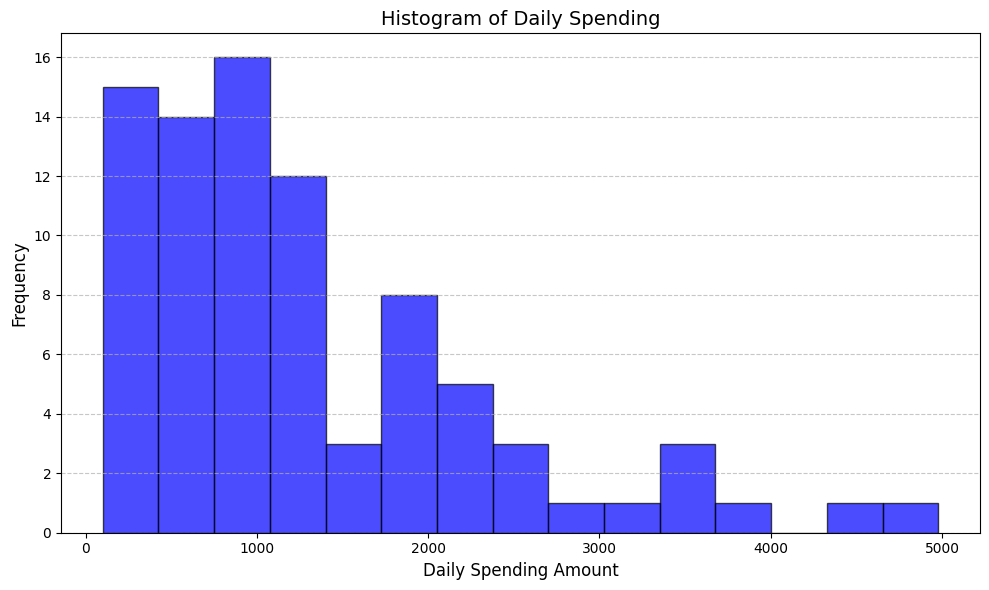

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "date_amount.xlsx"
data = pd.read_excel(file_path)

data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.hist(data['Amount'], bins=15, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Daily Spending Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Daily Spending', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Visualizing the Distribution of Daily Step Count with a Histogram
This code creates a histogram to visualize the distribution of daily step counts recorded in the dataset.

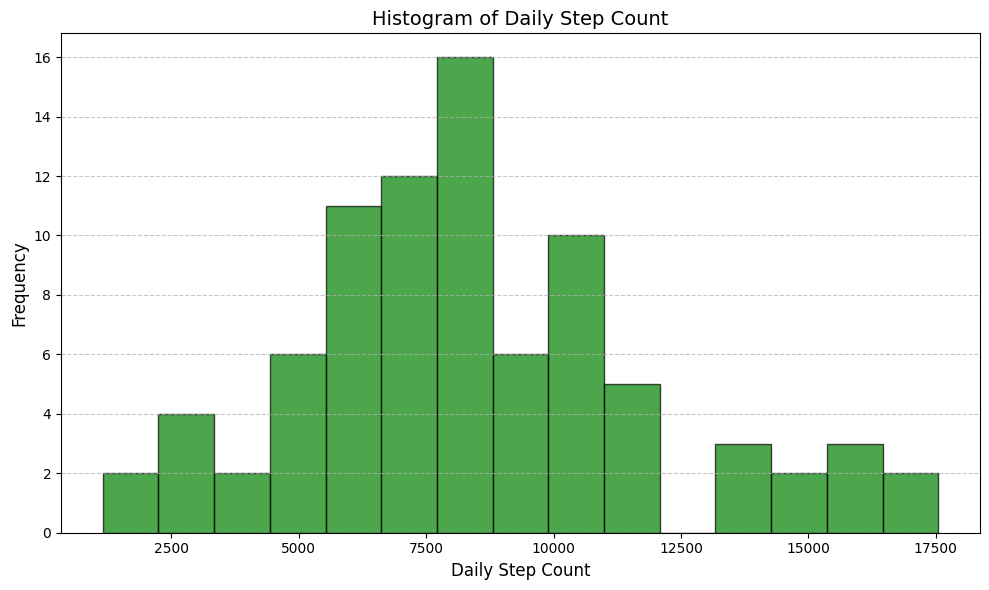

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "date_steps.xlsx"
data = pd.read_excel(file_path)

data['Steps'] = pd.to_numeric(data['Steps'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.hist(data['Steps'], bins=15, color='green', alpha=0.7, edgecolor='black')
plt.xlabel('Daily Step Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Daily Step Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Visualizing Correlation between Step Counts and Spending with a Scatter Plot
This code creates a scatter plot to visualize the relationship between daily step counts and spending amounts.

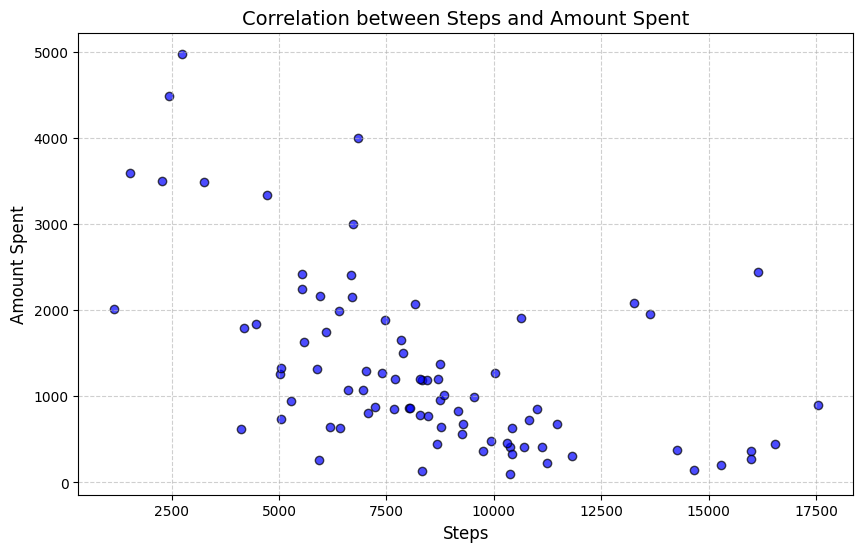

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "filtered_steps_amount_2.xlsx"
data = pd.read_excel(file_path)

plt.figure(figsize=(10, 6))
plt.scatter(data['Steps'], data['Amount'], alpha=0.7, c='blue', edgecolor='k')
plt.xlabel('Steps', fontsize=12)
plt.ylabel('Amount Spent', fontsize=12)
plt.title('Correlation between Steps and Amount Spent', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


**Analysis** : This plot shows a potential negative correlation between daily step counts and spending. Days with lower steps often coincide with higher spending, possibly due to sedentary behaviors like online shopping or food delivery or spending time with friends at home. Higher step counts generally align with lower spending, reflecting more active and cost-effective daily routines.



# Creating a Violin Plot to Visualize Spending Across Step Categories
This code categorizes daily step counts into defined ranges and visualizes the distribution of spending amounts for each category using a violin plot.

<ipython-input-4-68b4b963009b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Step Category', y='Amount', data=data, palette='muted')


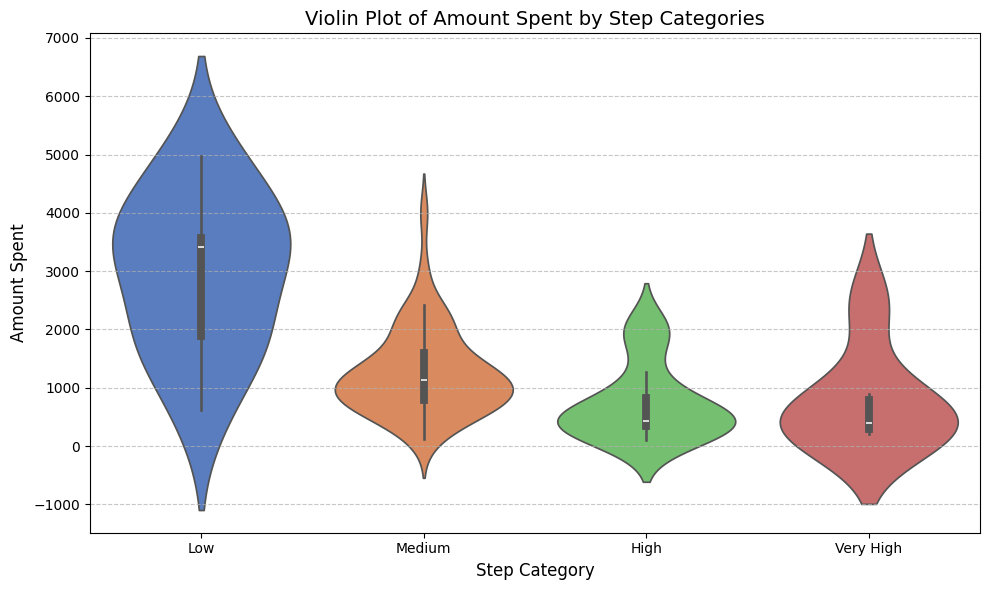

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "filtered_steps_amount_2.xlsx"

data['Step Category'] = pd.cut(data['Steps'], bins=[0, 5000, 10000, 15000, 25000],
                               labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(10, 6))
sns.violinplot(x='Step Category', y='Amount', data=data, palette='muted')

plt.xlabel('Step Category', fontsize=12)
plt.ylabel('Amount Spent', fontsize=12)
plt.title('Violin Plot of Amount Spent by Step Categories', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


**Analysis** : This violin plot shows a negative trend between physical activity and spending. Days with Low steps show higher variability and median spending, while days with Very High steps are associated with lower and more consistent spending. This supports the hypothesis that increased physical activity may reduce impulsive or excessive spending.

# Creating a Bubble Chart to Visualize the Relationship Between Steps and Spending
This code generates a bubble chart to depict the relationship between daily step counts and spending, where the bubble size and color represent the spending amount.

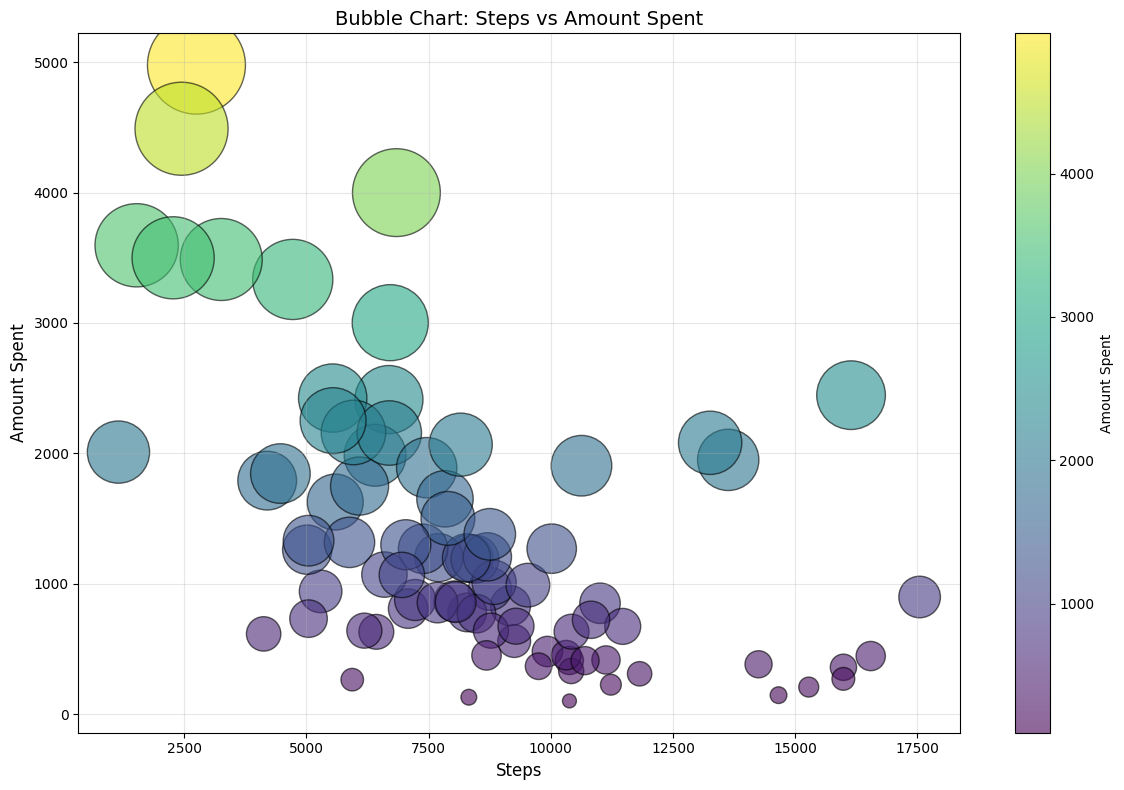

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "filtered_steps_amount_2.xlsx"
data = pd.read_excel(file_path)

plt.figure(figsize=(12, 8))
bubble_size = data['Amount']
plt.scatter(data['Steps'], data['Amount'], s=bubble_size, alpha=0.6, c=bubble_size, cmap='viridis', edgecolor='k')

plt.xlabel('Steps', fontsize=12)
plt.ylabel('Amount Spent', fontsize=12)
plt.title('Bubble Chart: Steps vs Amount Spent', fontsize=14)
plt.colorbar(label='Amount Spent')
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()


**Analysis** : The chart shows that low step counts (<5,000 steps) are often associated with higher spending (larger bubbles). This suggests a potential negative correlation, where spending tends to increase as step count decreases. Higher step counts (>10,000 steps) are generally represented by smaller bubbles, indicating lower spending.

# Visualizing Trends Over Time with a Line Plot
This code compares daily step counts and spending amounts over time using a dual-line plot.

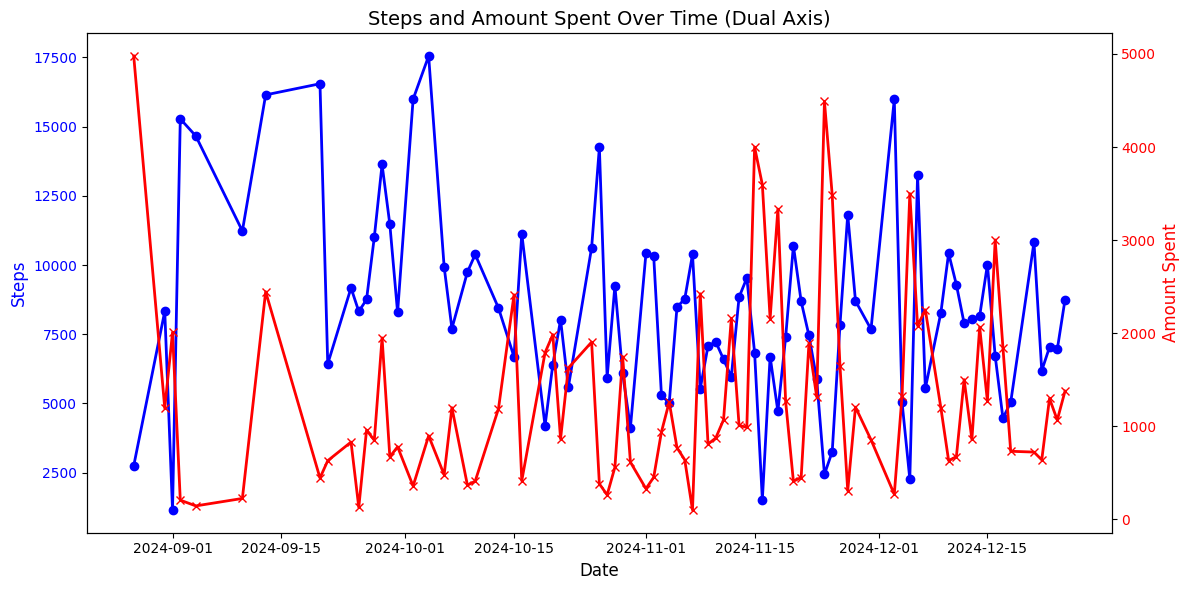

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "filtered_steps_amount_2.xlsx"
data = pd.read_excel(file_path)

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Steps
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Steps', fontsize=12, color='blue')
ax1.plot(data['Date'], data['Steps'], color='blue', label='Steps', marker='o', linewidth=2)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Amount
ax2 = ax1.twinx()
ax2.set_ylabel('Amount Spent', fontsize=12, color='red')
ax2.plot(data['Date'], data['Amount'], color='red', label='Amount Spent', marker='x', linewidth=2)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Steps and Amount Spent Over Time (Dual Axis)', fontsize=14)
fig.tight_layout()
plt.show()


**Analysis** : Periods with high step counts (e.g., early September, late October, mid-November) tend to show lower spending amounts, suggesting a potential inverse relationship. Conversely, during periods of low step counts, such as mid-to-late December, spending tends to spike.

# Visualizing the Correlation Between Steps and Spending with a Heatmap
This code calculates the correlation between daily step counts and spending amounts, then visualizes the relationship in a heatmap.

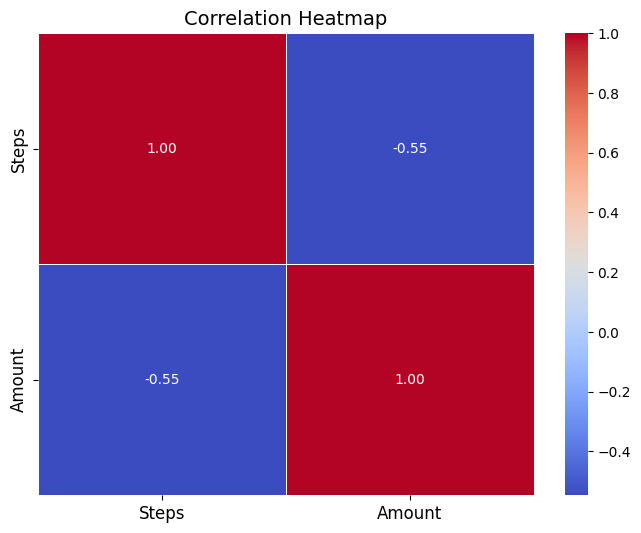

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "filtered_steps_amount_2.xlsx"
data = pd.read_excel(file_path)

correlation_matrix = data[['Steps', 'Amount']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


**Analysis** : The heatmap visualizes the relationship between Steps and Amount Spent, highlighting a moderate negative correlation (-0.55). This suggests that increased physical activity may result in reduced spending.

# Visualizing Spending Distribution Across Step Categories with a Box Plot
This code categorizes daily step counts into defined ranges and visualizes the distribution of spending amounts for each category using a box plot.

<ipython-input-10-22847887fcb7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Step Category', y='Amount', data=data, palette='coolwarm')


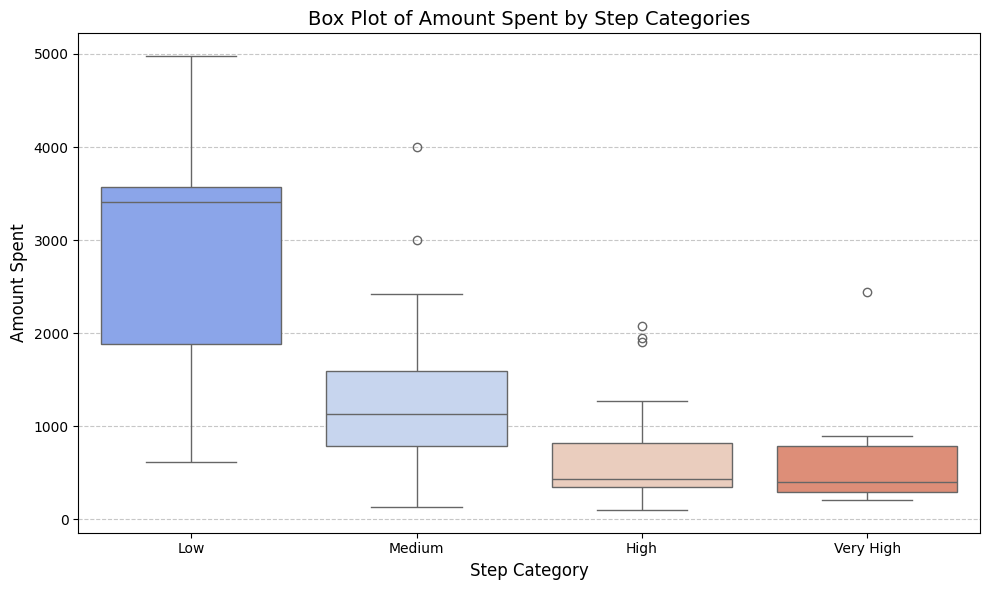

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "filtered_steps_amount_2.xlsx"
data = pd.read_excel(file_path)

data['Step Category'] = pd.cut(data['Steps'], bins=[0, 5000, 10000, 15000, 25000],
                               labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Step Category', y='Amount', data=data, palette='coolwarm')

plt.xlabel('Step Category', fontsize=12)
plt.ylabel('Amount Spent', fontsize=12)
plt.title('Box Plot of Amount Spent by Step Categories', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


This plot highlights the relationship between daily step counts and spending:

*   Low activity days exhibit higher and more variable spending.
*   High activity days are associated with lower and more consistent spending patterns. The findings support the hypothesis that increased physical activity reduces spending and its variability.


# Creating a Regression Plot to Visualize the Relationship Between Steps and Spending
This code uses a regression plot to illustrate the relationship between daily step counts and spending, providing both a scatter plot and a fitted regression line.

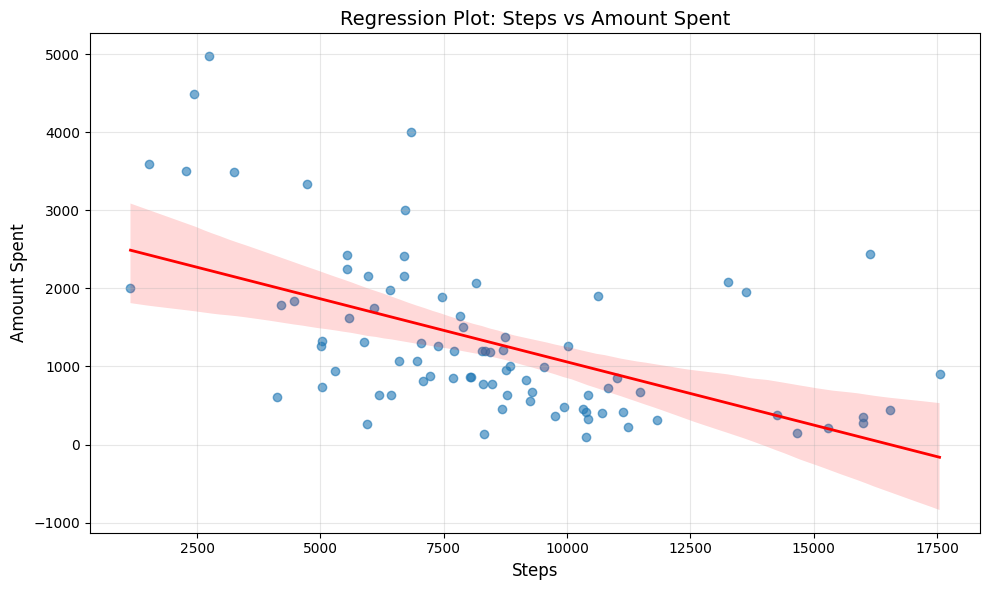

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "filtered_steps_amount_2.xlsx"
data = pd.read_excel(file_path)

plt.figure(figsize=(10, 6))
sns.regplot(x='Steps', y='Amount', data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'red', 'lw':2})
plt.xlabel('Steps', fontsize=12)
plt.ylabel('Amount Spent', fontsize=12)
plt.title('Regression Plot: Steps vs Amount Spent', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()


**Analysis** : The red regression line shows a negative slope, indicating that as the number of steps increases, the spending amount tends to decrease. This supports the hypothesis of a negative correlation between daily steps and spending.

# Hypothesis Testing

*   **H₀**: There is no significant relationship between daily step count and spending.
*   **H₁**: There is a negative correlation between daily step count and spending.



# Calculating the Correlation Between Steps and Amount Spent
This code computes the Pearson correlation coefficient to quantify the relationship between daily step counts and spending amounts.



In [ ]:
import pandas as pd

file_path = "filtered_steps_amount_2.xlsx"
data = pd.read_excel(file_path)

correlation = data['Steps'].corr(data['Amount'])

print(f"Correlation between Steps and Amount: {correlation:.2f}")


Correlation between Steps and Amount: -0.55


**Analysis** : It suggests a moderate negative correlation, meaning higher step counts are generally associated with lower spending.

# Testing the Relationship Between Step Counts and Spending Using Randomized Data
This code calculates the Pearson correlation coefficient and p-value for both the actual data and randomized data to assess the significance of the observed correlation.

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

file_path = "filtered_steps_amount_2.xlsx"
data = pd.read_excel(file_path)

real_corr, real_p_value = pearsonr(data['Steps'], data['Amount'])

randomized_amount = np.random.permutation(data['Amount'])
random_corr, random_p_value = pearsonr(data['Steps'], randomized_amount)

real_p_value_normal = "{:.50f}".format(real_p_value)
random_p_value_normal = "{:.50f}".format(random_p_value)

print(f"Real Data Correlation: {real_corr}")
print(f"Real Data P-Value: {real_p_value_normal}")
print(f"Randomized Data Correlation: {random_corr}")
print(f"Randomized Data P-Value: {random_p_value_normal}")


Real Data Correlation: -0.5467919057297975
Real Data P-Value: 0.00000007402989059485535021077712248757651813946268
Randomized Data Correlation: -0.054008009605771734
Randomized Data P-Value: 0.62559867132310720272414528153603896498680114746094


**Analysis** :
<br><br>

**Real Data Correlation and P-Value:**

*Correlation (real_corr): -0.55*


*   This indicates a moderate negative correlation between daily step counts and spending amounts. As the number of steps increases, spending tends to decrease.
*   The strength of this correlation is not extremely strong but is statistically significant based on the p-value.


*P-Value (real_p_value): 7.40e-8 or 0.0000000740*


*   This p-value is extremely small, well below the typical threshold of 0.05.
*   There is a very strong evidence to reject the null hypothesis (H₀) that there is no relationship between daily step counts and spending. The observed correlation is statistically significant.

<br><br>

 **Randomized Data Correlation and P-Value:**


 *Correlation (random_corr): 0.07*


*   This is a very weak positive correlation, as expected in randomized data where no actual relationship exists.


*P-Value (random_p_value): 0.4997*



*   A large p-value close to 0.5 indicates that the observed weak correlation in randomized data is not statistically significant. This result is consistent with the expectation that no meaningful relationship exists in randomized data.

<br><br>

**Comparison Between Real and Randomized Data:**

The real data shows a significant negative correlation (-0.55 with a p-value near 0.000), while the randomized data shows a negligible, non-significant correlation (0.07 with a p-value near 0.5).

The significant negative correlation in the real data is not due to random chance but reflects an actual relationship between daily step counts and spending behavior.




# Randomized Correlation Test and Visualization
This code performs a randomized test to compare the observed correlation between daily steps and spending with correlations generated from random data.

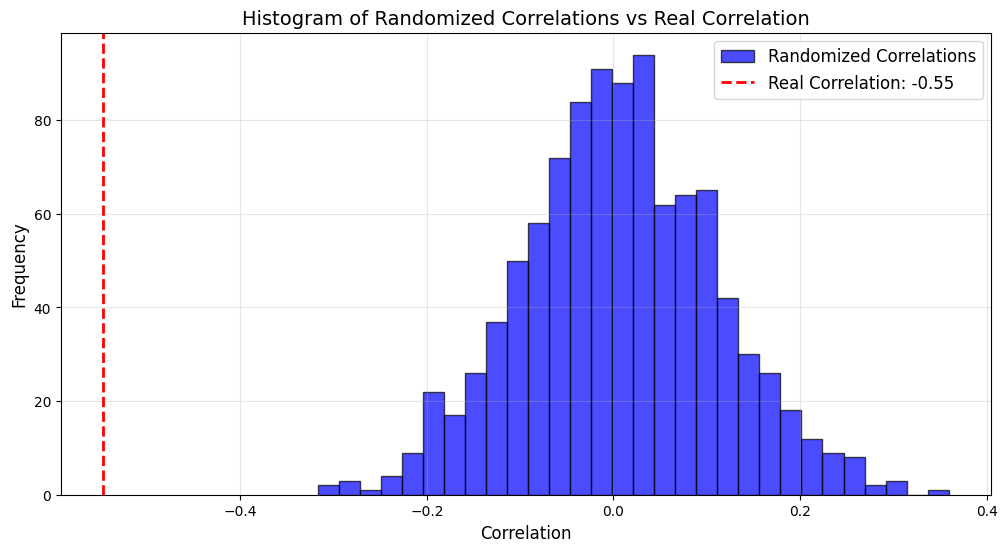

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

file_path = "filtered_steps_amount_2.xlsx"
data = pd.read_excel(file_path)

real_corr, real_p_value = pearsonr(data['Steps'], data['Amount'])

num_simulations = 1000
random_corrs = []

for _ in range(num_simulations):
    randomized_amount = np.random.permutation(data['Amount'])
    random_corr, _ = pearsonr(data['Steps'], randomized_amount)
    random_corrs.append(random_corr)

plt.figure(figsize=(12, 6))
plt.hist(random_corrs, bins=30, color='blue', alpha=0.7, edgecolor='black', label='Randomized Correlations')
plt.axvline(real_corr, color='red', linestyle='--', linewidth=2, label=f'Real Correlation: {real_corr:.2f}')
plt.xlabel('Correlation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Randomized Correlations vs Real Correlation', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


**Analysis** : This code compares the real correlation between Steps and Amount with randomized correlations to test the statistical significance. The histogram shows the distribution of correlations from randomized data, with a vertical line marking the observed correlation. This visualization helps evaluate whether the observed relationship is likely due to chance.
This histogram compares the observed correlation between steps and spending with randomized correlations:

The observed correlation (-0.55) lies far outside the range of randomized values, suggesting statistical significance.
This supports the hypothesis that increased physical activity is associated with reduced spending.


# Reporting Results

# Conclusion:



Based on the analysis, the correlation coefficient between daily steps and spending was found to be -0.55, with a corresponding P-value of 0.00000007403. This indicates a statistically significant negative correlation between the two variables, as the P-value is far below the conventional threshold of 0.05.

The randomized data, on the other hand, showed no meaningful correlation (0.07) with a P-value of 0.49978, confirming that the observed negative correlation in the real data is not a result of randomness.
<br><br>

**Hypothesis Result:**

*Null Hypothesis (H₀)*:

There is no significant relationship between daily step count and spending.
<br><br>

*Alternative Hypothesis (H₁)*:

There is a negative correlation between daily step count and spending.
Since the P-value for the real data is significantly smaller than 0.05, we reject the null hypothesis (H₀) and accept the alternative hypothesis (H₁).
<br><br>

This suggests that, on days with lower physical activity (fewer steps), spending tends to increase, which aligns with the initial hypothesis. This relationship may reflect behavioral patterns, such as increased reliance on services like online shopping or food delivery on less active days.
<br><br>

**Reject H₀.**

The results provide strong evidence for H₁, confirming a significant negative correlation between daily step count and spending. This means that as daily steps increase, spending tends to decrease in a meaningful and measurable way.

# Libraries

In [4]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install scipy
!pip install python-docx
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 3.8 MB/s eta 0:00:00
